In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor,LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.base import clone



from sklearn import datasets
from sklearn.linear_model import LogisticRegression

In [3]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
y

array([[ 5.72135161],
       [ 5.12404096],
       [ 8.50429779],
       [ 6.06274382],
       [ 4.47671899],
       [ 4.39854933],
       [ 9.15287568],
       [ 4.92387566],
       [ 6.58732198],
       [ 5.45051723],
       [ 7.13874646],
       [ 8.81158423],
       [ 4.95202516],
       [ 5.6710351 ],
       [ 4.49387346],
       [ 7.19264365],
       [11.91195799],
       [ 3.7701185 ],
       [ 8.84243947],
       [10.13114165],
       [ 3.94620195],
       [ 8.50486763],
       [ 9.43786409],
       [ 6.5603331 ],
       [ 9.9148423 ],
       [ 7.84841201],
       [ 9.16825212],
       [ 9.10386762],
       [ 8.20603477],
       [ 4.23132255],
       [ 8.86504107],
       [10.79579741],
       [ 5.68864492],
       [ 7.62698173],
       [ 9.11640298],
       [ 6.01503906],
       [ 8.07978467],
       [ 6.16246084],
       [ 8.61487952],
       [ 9.44654554],
       [ 7.04117902],
       [ 6.07631346],
       [ 8.35347657],
       [10.99797676],
       [ 5.7717687 ],
       [ 6

In [0]:
X_b = np.c_[np.ones((len(X), 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)


In [0]:
theta_best

array([[3.81209878],
       [3.15883583]])

In [0]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.88631969],
       [10.04505086]])

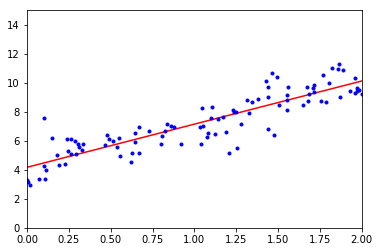

In [0]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [0]:
eta = 0.1 # learning rate
n_iterations = 1000
m = len(X)
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

In [0]:
theta

array([[4.17346925],
       [2.97731144]])

In [0]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

In [0]:
theta

array([[4.20928729],
       [3.01766745]])

In [8]:
y.ravel()

array([10.00011366,  9.4062907 ,  8.76321489,  5.43557401, 10.00502582,
        3.32679626,  6.31435226,  5.39626   ,  5.62692711,  4.91095382,
        6.71770706,  6.03071907,  4.26689776,  8.51041366,  5.07452153,
        8.00631059,  3.14846243,  8.80648037,  5.98779412, 11.96885905,
        6.11445771,  7.2278171 ,  8.55952701,  4.85969275,  4.16015655,
        5.3377212 ,  5.3704967 ,  6.27763457,  8.61002365,  8.40880111,
       10.56863277,  9.47473864,  5.81624047,  8.2701202 ,  8.56970636,
        5.27680916,  4.54891873,  3.89418642,  6.329876  ,  7.97044187,
        5.59926342,  6.30199117,  8.77872799,  9.79712396,  5.15494021,
        5.75281231,  6.19552087,  6.10534467,  5.62431026,  7.26216026,
        6.70263679,  8.99488218,  6.83190415,  8.33114649,  8.28144979,
        9.37118277,  3.95995101,  5.54960715,  7.0410823 ,  7.72756038,
        3.75873736,  3.82792669,  5.39855923,  4.71251294,  7.32787183,
        4.25048647,  7.36563885,  3.89097302,  6.22932835, 10.04

In [0]:
#in scikit-learn:
sgd_reg = SGDRegressor( penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [0]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.18909371]), array([3.03533009]))

In [0]:
#polynomial regresion
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [0]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [0]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_# y = 0.5x^2 + 1.0 *x + 2.0 + Gaussioan noise

(array([4.39869527]), array([[1.53191573, 0.77968366]]))

In [0]:
def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
    val_errors.append(mean_squared_error(y_val_predict, y_val))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

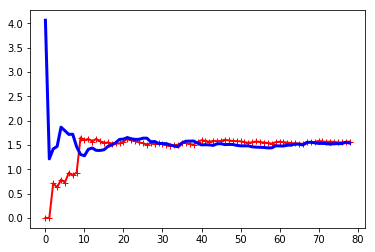

In [0]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)


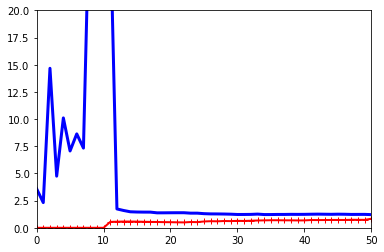

In [0]:
polynomial_regression = Pipeline((
("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
("sgd_reg", LinearRegression()),
))
axes = plt.gca()
axes.set_xlim([0,50])
axes.set_ylim([0,20])
plot_learning_curves(polynomial_regression, X, y)

In [0]:
#Ridge Regression 
#using  matrix factorisation technique by Andre-Louis Cholesky
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[8.5106111]])

In [0]:
#sing Stochastic Gradient Descent 
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([8.62774973])

In [0]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([8.4207944])

In [0]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([8.31587194])

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None,
                        learning_rate="constant", eta0=0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train, y_train) # continues where it left off
  y_val_predict = sgd_reg.predict(X_val)
  val_error = mean_squared_error(y_val_predict, y_val)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)
    
best_model

NameError: ignored

In [11]:
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [17]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0
iris["data"]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [18]:
X

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

In [0]:
log_reg = LogisticRegression()
log_reg.fit(X, y)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

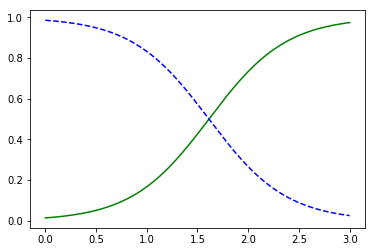

In [0]:
%matplotlib inline
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
# + more Matplotlib code to make the image look pretty

In [0]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [19]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [0]:
softmax_reg.predict([[5, 2]])

array([2])

In [0]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

AttributeError: ignored